# NumPy Tutorial

https://www.w3schools.com/python/numpy/

## Exponential Distribution

This distribution is related to the Poisson distribution. In Poisson, you show the probability distribution of an event occurring within a certain dimension (time, space) if it has a known mean frequency. In the Exponential distribution, you show the probability distribution the dimension (e.g., time or space) before the next event occurrence.

See the [Wikipedia article here](https://en.wikipedia.org/wiki/Exponential_distribution).

The inverse of the rate is indicated with `scale` in `numpy.random.exponential()` and the `size` dictates the size of the returned array.

In [19]:
import numpy as np
from configurations import printer

scales_to_cycle_through = [1, 10, 100]
for scale in scales_to_cycle_through:
    my_array = np.random.exponential(scale=scale, size = 10)
    printer(
        'These are 10 examples of the results from an exponential\n'
        'distribution with scale = %s:\n%s\nThey have mean:\n%s\n',
        scale,
        my_array,
        np.mean(my_array)
        )

These are 10 examples of the results from an exponential
distribution with scale = 1:
[1.45640275 0.13606536 0.49866445 0.47112456 0.20664339 0.94087148
 0.01489222 0.37944795 1.41179372 1.88996632]
They have mean:
0.740587220689231

These are 10 examples of the results from an exponential
distribution with scale = 10:
[18.25896111 24.30405197  4.9578967  11.27938074  2.29581475 15.66252212
  9.15077244  0.12547267  2.28314297  6.58863911]
They have mean:
9.49066545993708

These are 10 examples of the results from an exponential
distribution with scale = 100:
[ 45.23667778  89.65692596 351.53692333 222.91719506 108.15275899
   4.97691929  18.50065755 425.37182326 136.03469912 224.22941326]
They have mean:
162.6613993584692



### Visualization of the Exponential distribution


2023-08-26 18:58:17 
	Logger: numpy-tutorial Module: 3446447805 Function: <module> File: 3446447805.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 18:58:17 
	Logger: numpy-tutorial Module: 3446447805 Function: <module> File: 3446447805.py Line: 13
Matplotlib.pyplot does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



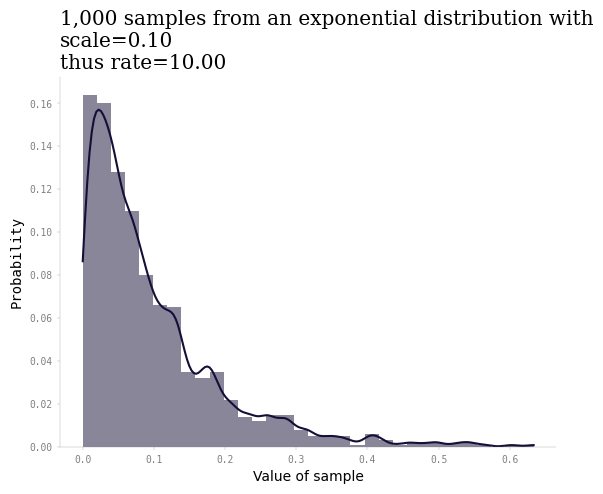

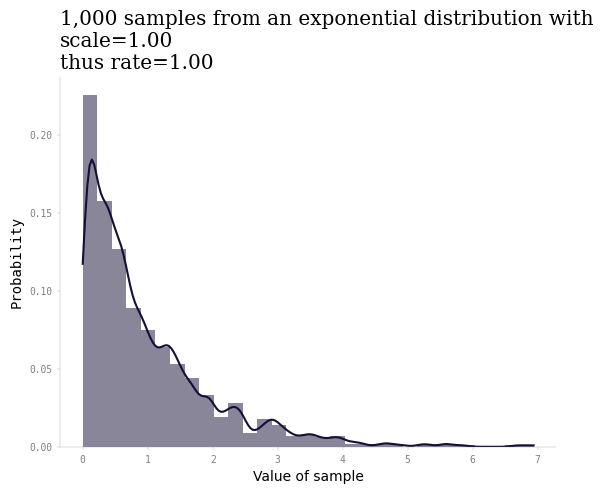

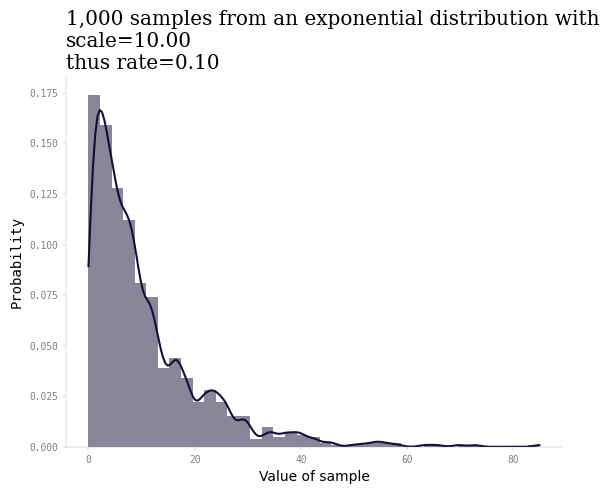

In [1]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib.pyplot does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def plot_exponential(
    scale: float = 1,
    size: int = 1_000,
    bw_adjust: float = 1
    ) -> None:

    my_exponential = np.random.exponential(scale=scale, size=size)
    
    sns.histplot( # type: ignore
        my_exponential,
        ax=plt.subplots()[1], # type: ignore
        stat='probability',
        kde=True,
        kde_kws={'bw_adjust' : bw_adjust},
        edgecolor='None'
        )
    
    plt.title( # type: ignore
        label=f'{size:,} samples from an exponential distribution with\n'
        f'scale={scale:,.2f}'
        f'\nthus rate={1/scale:,.2f}',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
scales_bandwidths_to_cycle_through = {
    0.1 : 0.415,
    1 : 0.410,
    10 : 0.400
    }

for scale in scales_bandwidths_to_cycle_through:
    plot_exponential(
        scale=scale,
        bw_adjust=scales_bandwidths_to_cycle_through[scale]
        )

The exponential distribution is **not the same** as a log-normal distribution (although you may read this online).

There is not a straightforward way to convert an exponential distribution to a normal distribution. One can use the `scikit-learn` transformers, as indicated in [this post](https://datascience.stackexchange.com/questions/18933/convert-exponential-to-normal-distribution), but that is beyond the scope of this notebook.

The below cell shows how it works with a normal distribution which can be transformed into a log-normal distribution, and a log-normal distribution which can be transformed into a normal distribution.


2023-08-26 16:22:42 
	Logger: numpy-tutorial Module: 2230416063 Function: <module> File: 2230416063.py Line: 8
Seaborn does not seem to export a stub to help linters with type hints
so I am explicitly disabling type hints on those lines.


2023-08-26 16:22:42 
	Logger: numpy-tutorial Module: 2230416063 Function: <module> File: 2230416063.py Line: 13
Matplotlib does not seem to have types set up for linters.
So I am explicitly disabling type hints on those lines.



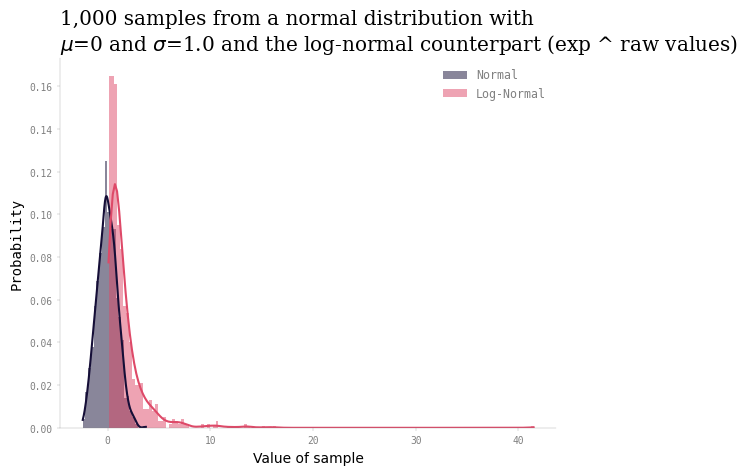

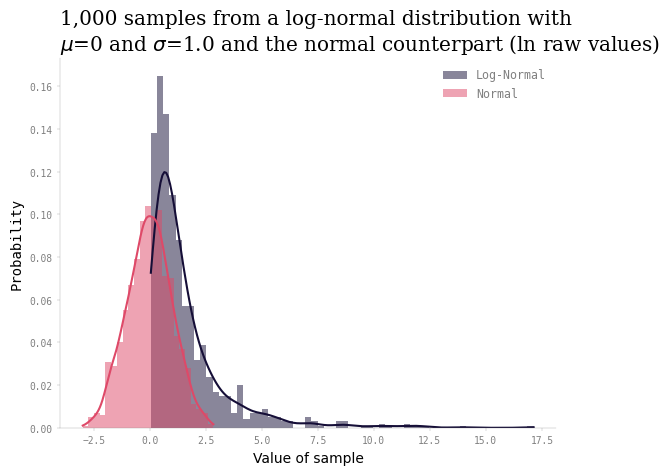

In [63]:
import numpy as np
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt
from configurations import logger

plt.style.use('my_mpl_stylesheet.mpltstyle')

logger.warning(
    'Seaborn does not seem to export a stub to help linters with type hints\n'
    'so I am explicitly disabling type hints on those lines.'
)

logger.warning(
    'Matplotlib does not seem to have types set up for linters.\n'
    'So I am explicitly disabling type hints on those lines.'
)

def choose_my_color(integer: int = 0) -> str:
    return (plt.rcParams["axes.prop_cycle"] # type: ignore
            .by_key()["color"][integer]
            )

def plot_normal_and_log_normal(
        size: int = 10,
        loc: float = 0,
        scale: float = 1
        ) -> None:
    my_normal = np.random.normal(loc=loc, scale=scale, size=size)
    my_log_normal = np.exp(my_normal)

    ax=plt.subplots()[1] # type: ignore
    
    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        label='Normal',
        color=choose_my_color(0)
        )

    sns.histplot( # type: ignore
        my_log_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        label='Log-Normal',
        color=choose_my_color(5)
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from a normal distribution with\n'
        fr'$\mu$={loc:,.0f} and $\sigma$={scale:.1f}'
        ' and the log-normal counterpart (exp ^ raw values)',
        family='serif'
        )

    plt.xlabel(xlabel='Value of sample', family='sans-serif') #type: ignore
    
plot_normal_and_log_normal(size=1_000)

def plot_log_normal_and_normal(
    mean: float = 0,
    sigma: float = 1,
    size: int = 1_000,
    bw_adjust: float = 1
    ) -> None:

    my_log_normal = np.random.lognormal(mean=mean, sigma=sigma, size=size)
    my_normal = np.log(my_log_normal)
    
    ax = plt.subplots()[1] # type: ignore

    sns.histplot( # type: ignore
        my_log_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        label='Log-Normal',
        color=choose_my_color(0)
        )

    sns.histplot( # type: ignore
        my_normal,
        ax=ax,
        stat='probability',
        kde=True,
        edgecolor='None',
        label='Normal',
        color=choose_my_color(5)
        )
    
    ax.legend() # type: ignore

    plt.title( # type: ignore
        label=f'{size:,} samples from a log-normal distribution with\n'
        fr'$\mu$={mean:,.0f} and $\sigma$={sigma:.1f}'
        ' and the normal counterpart (ln raw values)',
        family='serif'
        )
    
    plt.xlabel(xlabel='Value of sample', family='sans-serif') # type: ignore
    
plot_log_normal_and_normal(size=1_000)